In [25]:
import pandas as pd

In [26]:
agri_gdp_data = pd.read_csv('./agri_gdp_data.csv')
agri_gdp_data = agri_gdp_data.drop(columns='Unnamed: 0')


Train test split

In [27]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
agri_gdp_data.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'Code', 'gdp'],
      dtype='object')

In [29]:
agri_gdp_tr = agri_gdp_data.copy()
agri_gdp_tr.head()
agri_gdp_data = agri_gdp_tr.drop("total_emission", axis=1)
agri_gdp_labels = agri_gdp_tr["total_emission"].copy()

X_train, X_test, y_train, y_test = train_test_split(agri_gdp_data, agri_gdp_labels, test_size=0.2)

pipeline

In [30]:
imputer = SimpleImputer(strategy="most_frequent")
std_scaler = StandardScaler()

num_pipeline = Pipeline([
    ("imputer", imputer),
    ("std_scaler", std_scaler)
])
num_col = agri_gdp_data.select_dtypes(['number']).columns

# converting categorical data
cat_encoder = OneHotEncoder(handle_unknown="ignore")
cat_col = agri_gdp_data.select_dtypes(['object']).columns

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", cat_encoder, cat_col)
])

In [31]:
training_prepared = full_pipeline.fit_transform(X_train)
test_prepared = full_pipeline.transform(X_test) # do we put this through the pipeline i forget

regression & error

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_mse_rmse(predictions, labels):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

In [33]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_prepared, y_train)

lin_pred = lin_reg.predict(training_prepared)

lin_mse, lin_rmse = calculate_mse_rmse(lin_pred, y_train)
print("training mse: ", lin_mse)
print("training rmse: ", lin_rmse)

lin_test_pred = lin_reg.predict(test_prepared)

lin_mse, lin_rmse = calculate_mse_rmse(lin_test_pred, y_test)
print("test mse: ", lin_mse)
print("test rmse: ", lin_rmse)

training mse:  18.744640484770336
training rmse:  4.329508111179645
test mse:  21.12113281882578
test rmse:  4.5957733646064165


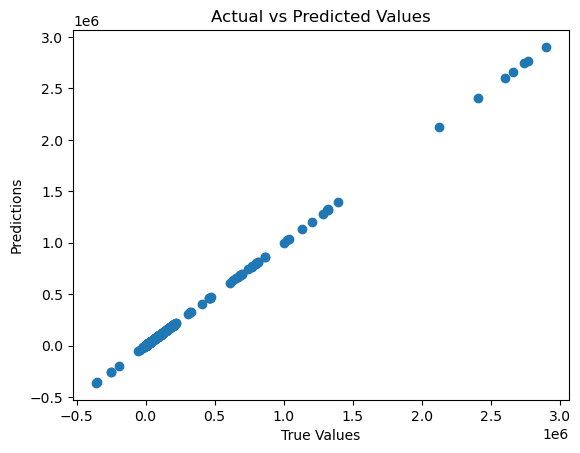

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lin_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values")
plt.show()

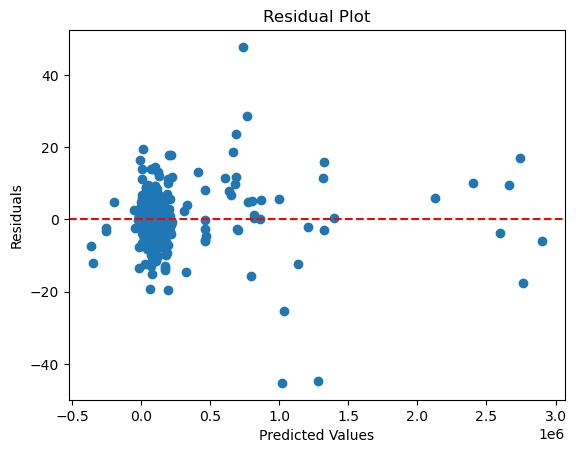

In [35]:
residuals = y_test - lin_test_pred

plt.scatter(lin_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


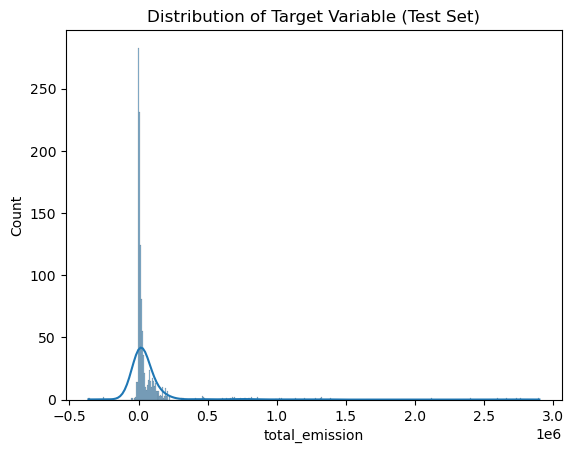

In [36]:
import seaborn as sns
sns.histplot(y_test, kde=True)
plt.title("Distribution of Target Variable (Test Set)")
plt.show()

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


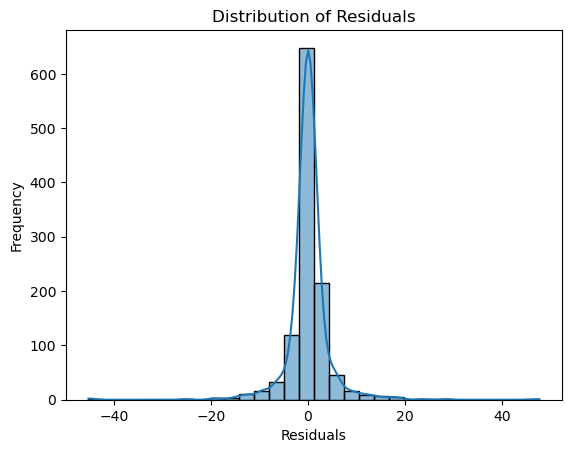

In [37]:
import seaborn as sns

sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

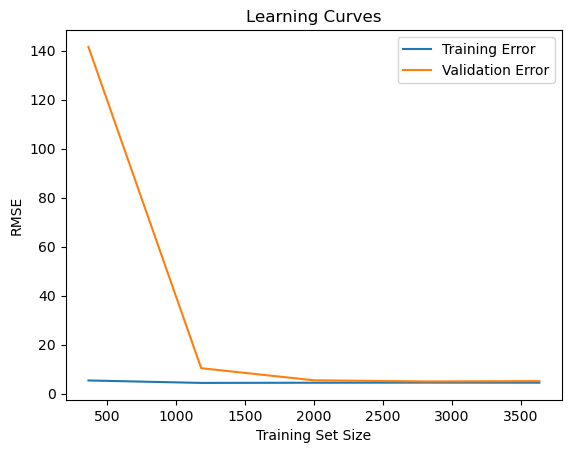

In [38]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, training_prepared, y_train, scoring="neg_mean_squared_error", cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label="Training Error")
plt.plot(train_sizes, test_rmse, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.show()